# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

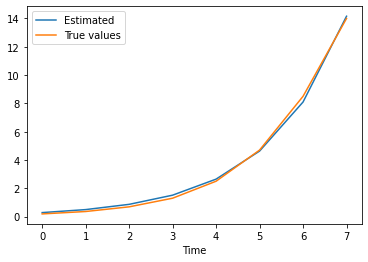

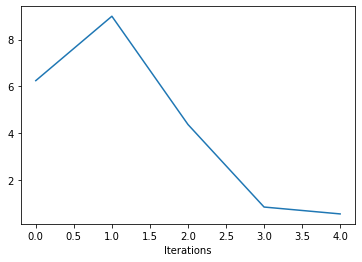

In [5]:
def fit_function(input_values, t):
    x1 = input_values[0]
    x2 = input_values[1]
    return x1 * x2 ** t

# def population_growth(initial, true_y):
#     #print(initial)
#     x1 = initial[0]
#     x2 = initial[1]
    
#     timesteps = np.arange(len(true_y))
#     #print(timesteps)
#     jacobian = np.empty([len(true_y), 2])
#     summed_res = 100
    
#     while summed_res > 2:
#         est_y = []
#         for t in timesteps:
#             estimate = fit_function(initial, t)
#             est_y.append(estimate)
#             dx1 = - x2 ** t
#             dx2 = - x1 * t * x2 ** (t - 1)
#             jacobian[t, 0] = dx1
#             jacobian[t, 1] = dx2
            
        
#         #print(jacobian)
#         residual = np.array(est_y) - np.array(true_y)
#         summed_res = np.linalg.norm(residual)
#         s = np.linalg.lstsq(jacobian, - residual.T, None)[0]  # dit is niet helemaal de bedoeling denk ik
#         initial = initial - s
        
#         s = np.linalg.solve(jacobian.T @ jacobian, jacobian.T @ residual)
    
#     return est_y, timesteps

def gauss_newton(input_values, true_y):
    """
    The Gauss-Newton method to fit the model function given above, to the data; finds estimates for the initial values
    based on the given data.
    Input:
    input_values    = (2,) array with initial input values for the function (x0)
    true_y          = list of datapoints that the model should approximate
    
    Output:
    Mostly for plotting purposes.
    est_y           = estimated y values for the function based on the input values found
    timesteps       = list of values aranged between 0 and the length of true_y; for plotting purposes
    saved_residuals = list of residual values per loop
    k               = number of loops needed for convergence
    
    """
    # Get the length of the y vector
    n = len(true_y)
    
    # Arrange the timesteps over n to loop over this
    timesteps = np.arange(n)
    
    # Create an empty matrix to fill with derivatives; dimensions equal to length true_y 
    # x nr of first derivatives
    jacobian = np.empty([n, 2])
    
    # Initialize summed_res(iduals) at a high number for the while statement
    summed_res = 100
    
    # Initialize k to count the loops
    k = 0
    
    # Save residuals per loop
    saved_residuals = []
    
    
    # Keep running until convergence, arbitrarily set at a residual of <0.75
    while k < 1000 and summed_res > 0.75:
        k += 1
        
        # Get estimated y values based on the current input values
        # Input values has to be an iterable for the map function to work
        est_y = list(map(fit_function, [input_values] * n, timesteps))
        
        # Calculate residuals between the estimated and true y values
        residual = np.array(est_y) - np.array(true_y)
        summed_res = np.linalg.norm(residual)
        saved_residuals.append(summed_res)
        
        # Fill the Jacobian
        for t in timesteps:
            
            # Derivative over x1
            dx1 = - input_values[1] ** t
            
            # Derivative over x2
            dx2 = - input_values[0] * t * input_values[1] ** (t - 1)
            jacobian[t, 0] = dx1
            jacobian[t, 1] = dx2


        # Alternative methods to solve Js = r for s; the least squares method worked better so is currently implemented
        #s = np.linalg.solve(jacobian.T @ jacobian, jacobian.T @ - residual)
        s = np.linalg.lstsq(jacobian, - residual, None)[0]
        
        # Update input values with s
        input_values = input_values - s
    
    return est_y, timesteps, saved_residuals, k

P0 = 0.5
growth_rate = 1.5
start_rates = np.array([P0, growth_rate])
y, time, residuals, k = gauss_newton(start_rates, data)
#print(x_val)

# Plotting
k_space = np.arange(k)
plt.plot(time, y, label = "Estimated")
plt.plot(time, data, label = "True values")
plt.xlabel("Time")
plt.legend()
plt.show()

# plt.plot(k_space, )
# plt.show()

plt.plot(k_space, residuals)
plt.xlabel("Iterations")
plt.show()



# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


In [17]:
def fit_function(initial, t):
    x1 = initial[0]
    x2 = initial[1]
    return x1 * x2 ** t

def get_F(T, initial, t):
    return T * fit_function(initial, t)

def get_Y(T, y):
    return T @ y

def least_squares_problem(initial, t, true_y):
    sigma = [x * 0.05 for x in y]
    I = np.identity(len(y))
    T = sigma * I
    F = get_F(T, initial, t)
    Y = get_Y(T, y)
    residual = np.linalg.norm(F - Y)**2
    return optimize.minimize(1/2 * residual, initial)


y = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

P0 = 100
growth_rate = 0.05
start_rates = np.array([P0, growth_rate])
timesteps = np.arange(len(y))

print(least_squares_problem(start_rates, t, y))

TypeError: 'numpy.float64' object is not callable

In [10]:
# def to_minimize(matrix, vector1, vector2):
#     F = T @ est_y
#     Y = T @ true_y
#     return ()

def weighted_lsq(input_values, true_y):
    n = len(true_y)
    T = np.zeros((n, n))
    timesteps = np.arange(n)
    
    for i in range(n):
        T[i,i] = 0.05 * true_y[i]
    
    est_y = list(map(fit_function, [input_values] * n, timesteps))
    F = T @ est_y
    Y = T @ true_y
    residual = np.linalg.norm(F - Y)
    return 1/2 * residual
    
    
P0 = 0.5
growth_rate = 1.5
start_rates = np.array([P0, growth_rate])
x_val = optimize.minimize(weighted_lsq, start_rates, data)["x"]
timesteps = np.arange(len(data))
est_y = list(map(fit_function, [x_val] * n, timesteps))

    

#weighted_lsq(start_rates, data)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 8)

Your answer here

----------------------
# Exercise 2 (4.5 points)



In [25]:
global xVals
xVals = []

# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

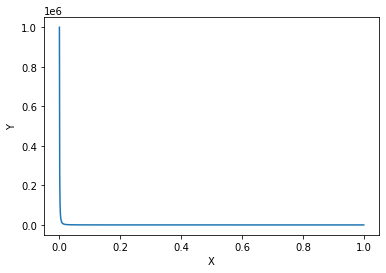

In [26]:
def function(x):
    xVals.append(x)
    return 1 / (x ** 2)


a = 10**-3
b = 1
x_val = np.arange(a, b, 0.001)
y_val = list(map(function, x_val))
    
plt.plot(x_val, y_val)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [27]:
# YOUR CODE HERE
y, error = integrate.quad(function, 10**-3, 1, epsabs=10**-4)
print("The result is:", y)
print("The error is:", error)

The result is: 999.0000000000119
The error is: 7.671666060337136e-05


# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


<ipython-input-28-df8ad7c5d31e>:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  y = integrate.quad(function, 0, 1)


Text(0.5, 1.0, 'Number of function evaluations in bin')

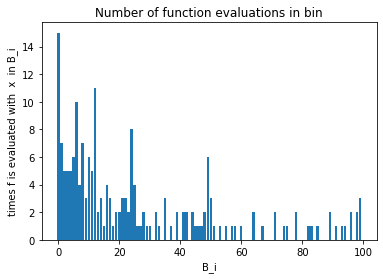

In [28]:
# Make bins
h = 0.01
B = []
end_bin = 0
i = 1
while end_bin < 1:
    start_bin = h * (i-1)
    end_bin = h*i
    i += 1
    B.append([start_bin, end_bin])
    
# Make list for all the x's for which f is evaluated
xVals = []
y = integrate.quad(function, 0, 1)

# For each bin  𝐵𝑖 , count the number of times  𝑓(𝑥)  is evaluated with  𝑥  in  𝐵𝑖
Bcount = np.empty(len(B))
for x in xVals:
    for idx in range(len(B)):
        if ((x >= B[idx][0]) and (x <= B[idx][1])):
            Bcount[idx] += 1

# plot the bin count -> how often 
plt.bar(np.arange(0, len(Bcount)), Bcount)
plt.xlabel("B_i")
plt.ylabel("times f is evaluated with  x  in B_i")
plt.title("Number of function evaluations in bin")

There is a large number of evaluations at the beginning of the region. If we look at f(x) we see that f(x) is high at very low values of x and then drops very quickly as x increase to 1. As x increases to 1, f(x) is almost zero, changing very little. The integral is harder to evaluate when it changes very rapidly as a function of x. Therefore, it makes sense that a nadaptive quadrature strategy, as is used by integrate.quad, would sample more points for in the region where x is very low  